# Matching FIRE Data with Sentinel-2 Observations

This notebook serves to demonstrate how data from the CCI FIRE ECV can be matched against single Sentinel-2 Observations provided by the Copernicus Data Space Ecosystem (CDSE). For this, we open the data sets separately and apply operations, some of whom provided by the ESA CCI Toolbox, to bring the data together.

This notebook runs in any Python environment which has the following packages installed:
- esa-climate-toolbox
- xcube-stac
- jupyterlab
- libgdal-netcdf

For convenience, there is an environment.yml in the folder next to this notebook you can use to create such an environment.

We start with necessary imports beforehand.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from xcube.core.gridmapping import GridMapping
from xcube.core.resampling import resample_in_space

from xcube.core.store import new_data_store

from esa_climate_toolbox.core import get_op
from esa_climate_toolbox.core import list_ecv_datasets
from esa_climate_toolbox.core import open_data

In [2]:
%matplotlib inline

As the CDSE provides data from the Copernicus Sentinel missions, it suggests itself to aim for combinations with data that is based on Sentinel missions. Using 'list_ecv_datasets', we may search for datasets for any ECV. We particularly want to look for FIRE data derived from Sentinel data. We may look for such datasets like this:

In [3]:
datasets = [(dataset, store) for dataset, store in list_ecv_datasets("FIRE") if "Sentinel" in dataset]
datasets

[('esacci.FIRE.mon.L4.BA.MSI-(Sentinel-2).Sentinel-2A.MSI.2-0.grid',
  'esa-cci'),
 ('esacci.FIRE.mon.L4.BA.MSI-(Sentinel-2).Sentinel-2A.MSI.v1-1.grid',
  'esa-cci'),
 ('esacci.FIRE.mon.L3S.BA.MSI-(Sentinel-2).Sentinel-2A.MSI.2-0.pixel~h32v13-fv2.0-CL',
  'esa-cci'),
 ('esacci.FIRE.mon.L3S.BA.MSI-(Sentinel-2).Sentinel-2A.MSI.2-0.pixel~h32v13-fv2.0-JD',
  'esa-cci'),
 ('esacci.FIRE.mon.L3S.BA.MSI-(Sentinel-2).Sentinel-2A.MSI.2-0.pixel~h32v13-fv2.0-LC',
  'esa-cci'),
 ('esacci.FIRE.mon.L3S.BA.MSI-(Sentinel-2).Sentinel-2A.MSI.2-0.pixel~h32v14-fv2.0-CL',
  'esa-cci'),
 ('esacci.FIRE.mon.L3S.BA.MSI-(Sentinel-2).Sentinel-2A.MSI.2-0.pixel~h32v14-fv2.0-JD',
  'esa-cci'),
 ('esacci.FIRE.mon.L3S.BA.MSI-(Sentinel-2).Sentinel-2A.MSI.2-0.pixel~h32v14-fv2.0-LC',
  'esa-cci'),
 ('esacci.FIRE.mon.L3S.BA.MSI-(Sentinel-2).Sentinel-2A.MSI.2-0.pixel~h32v15-fv2.0-CL',
  'esa-cci'),
 ('esacci.FIRE.mon.L3S.BA.MSI-(Sentinel-2).Sentinel-2A.MSI.2-0.pixel~h32v15-fv2.0-JD',
  'esa-cci'),
 ('esacci.FIRE.mon.L3S.BA

Of these, we pick the very first one, esacci.FIRE.mon.L4.BA.MSI-(Sentinel-2).Sentinel-2A.MSI.2-0.grid, which is provided on a global grid.

In [4]:
fire_ds, ds_name = open_data("esacci.FIRE.mon.L4.BA.MSI-(Sentinel-2).Sentinel-2A.MSI.2-0.grid")
fire_ds

<xarray.Dataset> Size: 27GB
Dimensions:                          (time: 12, lat: 3600, lon: 7200,
                                      vegetation_class: 18, bounds: 2, bnds: 2)
Coordinates:
  * lat                              (lat) float64 29kB 89.97 89.92 ... -89.97
    lat_bounds                       (lat, bounds) float64 58kB dask.array<chunksize=(3600, 2), meta=np.ndarray>
  * lon                              (lon) float64 58kB -180.0 -179.9 ... 180.0
    lon_bounds                       (lon, bounds) float64 115kB dask.array<chunksize=(7200, 2), meta=np.ndarray>
  * time                             (time) datetime64[ns] 96B 2019-01-16T12:...
    time_bnds                        (time, bnds) datetime64[ns] 192B dask.array<chunksize=(12, 2), meta=np.ndarray>
  * vegetation_class                 (vegetation_class) int32 72B 10 20 ... 180
Dimensions without coordinates: bounds, bnds
Data variables:
    burned_area                      (time, lat, lon) float32 1GB dask.array<chunksize=(1, 1800, 1800), meta=np.ndarray>
    burned_area_in_vegetation_class  (time, vegetation_class, lat, lon) float32 22GB dask.array<chunksize=(1, 18, 450, 480), meta=np.ndarray>
    crs                              float64 8B ...
    fraction_of_burnable_area        (time, lat, lon) float32 1GB dask.array<chunksize=(1, 1800, 1800), meta=np.ndarray>
    fraction_of_observed_area        (time, lat, lon) float32 1GB dask.array<chunksize=(1, 1800, 1800), meta=np.ndarray>
    standard_error                   (time, lat, lon) float32 1GB dask.array<chunksize=(1, 1800, 1800), meta=np.ndarray>
    time_bounds                      (time, bounds) float32 96B dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.FIRE.mon.L4.BA.MSI-(Sentinel-2).Sentinel-...
    date_created:            2025-09-29T15:48:30.342376
    processing_level:        L4
    time_coverage_start:     2019-01-01T00:00:00
    time_coverage_end:       2020-01-01T00:00:00
    time_coverage_duration:  P365DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

We now plot data from the very first timestep.

In [5]:
subset_time_index = get_op("subset_temporal_index")

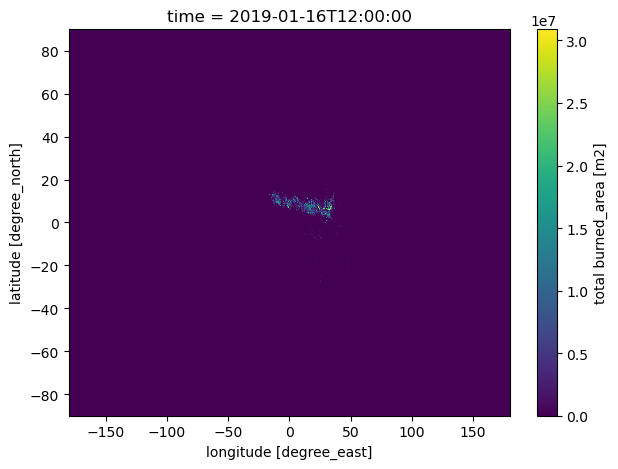

In [6]:
temp_sub_ds = subset_time_index(fire_ds, 0, 0)
temp_sub_ds.burned_area.plot()

As fire data only seems to be present in the center of the data, we select another subset, this time a spatial one.

In [7]:
subset_spatial = get_op("subset_spatial")

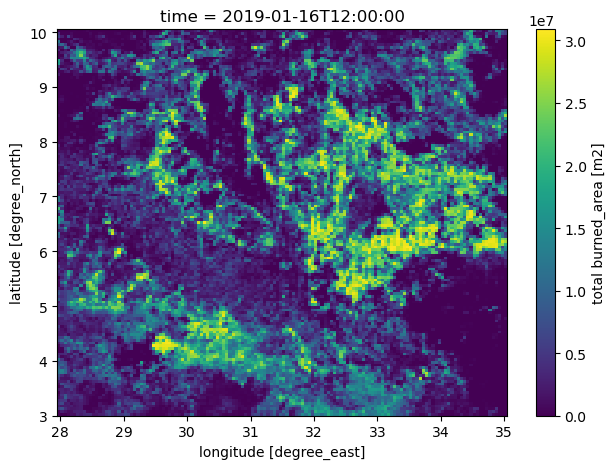

In [8]:
spat_temp_sub_ds = subset_spatial(temp_sub_ds, [28, 3, 35, 10])
spat_temp_sub_ds.burned_area.plot()

As we now have a single image, we aim for matching it with an observation from the CDSE. For this, we may use the stac-cdse store, which has been installed from the xcube-stac plugin. The store requires credentials, please consider the readme for information on how to obtain them.

In [9]:
cdse_credentials = dict(
    key=<your_key>,
    secret=<your_secret>
)

In [10]:
stac_cdse_store = new_data_store("stac-cdse", **cdse_credentials)

For more information on how to use the xcube-stac store (and on how to use it also for non-CDSE data), see https://github.com/xcube-dev/xcube-stac?tab=readme-ov-file#xcube-stac. For now, it should be enough to say that we can use the following code to search for observations from the same day that fall into the bounding box.

In [11]:
descriptors = list(
    stac_cdse_store.search_data(
        collections=["sentinel-2-l2a"],
        bbox=[28, 3, 35, 10],
        time_range=["2019-01-16", "2019-01-16"],
    )
)
[d.to_dict() for d in descriptors]

[{'data_id': 'collections/sentinel-2-l2a/items/S2B_MSIL2A_20190116T082309_N0500_R121_T36PTS_20221202T191827',
  'data_type': 'dataset',
  'bbox': [30.256088, 9.85132, 31.233987, 10.850374],
  'time_range': ('2019-01-16T08:23:09.024Z', '2019-01-16T08:23:09.024Z')},
 {'data_id': 'collections/sentinel-2-l2a/items/S2B_MSIL2A_20190116T082309_N0500_R121_T36PTR_20221202T191827',
  'data_type': 'dataset',
  'bbox': [30.263963, 8.948227, 31.026665, 9.945315],
  'time_range': ('2019-01-16T08:23:09.024Z', '2019-01-16T08:23:09.024Z')},
 {'data_id': 'collections/sentinel-2-l2a/items/S2B_MSIL2A_20190116T082309_N0500_R121_T36PTQ_20221202T191827',
  'data_type': 'dataset',
  'bbox': [30.271124, 8.044543, 30.819847, 9.039924],
  'time_range': ('2019-01-16T08:23:09.024Z', '2019-01-16T08:23:09.024Z')},
 {'data_id': 'collections/sentinel-2-l2a/items/S2B_MSIL2A_20190116T082309_N0500_R121_T36NTP_20221202T191827',
  'data_type': 'dataset',
  'bbox': [30.277577, 7.140815, 30.614471, 8.134753],
  'time_range':

We may now pick one of them, and we open bands B2, B3, and B4, which come in their 10m resolution.

In [12]:
ds = stac_cdse_store.open_data(
    "collections/sentinel-2-l2a/items/S2B_MSIL2A_20190116T082309_N0500_R121_T35NQF_20221202T191827",
    asset_names=["B04", "B03", "B02"]
)
ds

<xarray.Dataset> Size: 1GB
Dimensions:      (x: 10980, y: 10980)
Coordinates:
  * x            (x) float64 88kB 7e+05 7e+05 7e+05 ... 8.097e+05 8.098e+05
  * y            (y) float64 88kB 6e+05 6e+05 6e+05 ... 4.902e+05 4.902e+05
    spatial_ref  int64 8B 0
Data variables:
    B04          (y, x) float32 482MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    B03          (y, x) float32 482MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    B02          (y, x) float32 482MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
Attributes:
    stac_catalog_url:    https://stac.dataspace.copernicus.eu/v1
    stac_item_id:        S2B_MSIL2A_20190116T082309_N0500_R121_T35NQF_2022120...
    xcube_stac_version:  1.1.0

As this is a bit much for visualisation, we plot images where we only pick the tenth pixel from every row and column of the image.

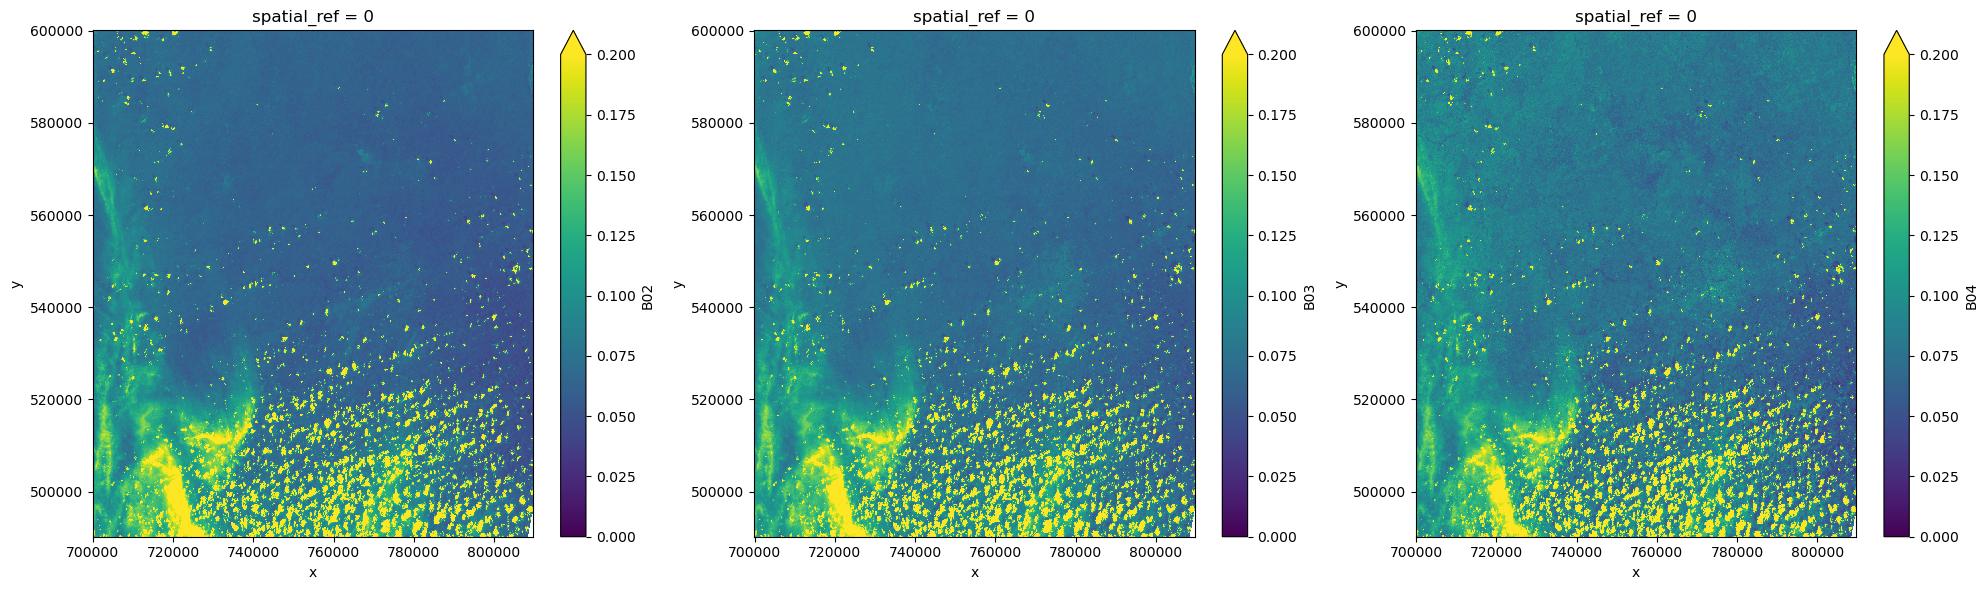

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ds.B02[::10, ::10].plot(ax=ax[0], vmin=0, vmax=0.2)
ds.B03[::10, ::10].plot(ax=ax[1], vmin=0, vmax=0.2)
ds.B04[::10, ::10].plot(ax=ax[2], vmin=0, vmax=0.2) 

Now we have the two datasets, but they are apparently provided with different spatial extents, even with different coordinate reference systems, which makes comparing the two hard. To easen this, we bring the datasets to the same grid. What we first need to do is to determine the gridmappings of the two datasets. Let's assume here that we want to bring the data onto the ECV grid, so that grid is the target, whilst the S2 dataset provides the source.

In [14]:
source_gm = GridMapping.from_dataset(ds)
source_gm

class: **RegularGridMapping**
* is_regular: True
* is_j_axis_up: False
* is_lon_360: _unknown_
* crs: PROJCRS["WGS 84 / UTM zone 35N",BASEGEOGCRS["WGS 84",DATUM["World Geodetic System 1984",ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4326]],CONVERSION["UTM zone 35N",METHOD["Transverse Mercator",ID["EPSG",9807]],PARAMETER["Latitude of natural origin",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",27,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["Scale factor at natural origin",0.9996,SCALEUNIT["unity",1],ID["EPSG",8805]],PARAMETER["False easting",500000,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",0,LENGTHUNIT["metre",1],ID["EPSG",8807]]],CS[Cartesian,2],AXIS["easting",east,ORDER[1],LENGTHUNIT["metre",1]],AXIS["northing",north,ORDER[2],LENGTHUNIT["metre",1]],ID["EPSG",32635]]
* xy_res: (10, 10)
* xy_bbox: (699960, 490200, 809760, 600000)
* ij_bbox: (0, 0, 10980, 10980)
* xy_dim_names: ('x', 'y')
* xy_var_names: ('x', 'y')
* size: (10980, 10980)
* tile_size: (1024, 1024)

In [15]:
target_gm = GridMapping.from_dataset(spat_temp_sub_ds)
target_gm

class: **RegularGridMapping**
* is_regular: True
* is_j_axis_up: False
* is_lon_360: False
* crs: EPSG:4326
* xy_res: (0.05, 0.05)
* xy_bbox: (27.949999999999996, 3, 35.050000000000004, 10.049999999999992)
* ij_bbox: (0, 0, 142, 141)
* xy_dim_names: ('lon', 'lat')
* xy_var_names: ('lon', 'lat')
* size: (142, 141)
* tile_size: (142, 141)

Now this is defined, we can use xcube's resample_in_space function (as introduced in the notebook showcasing how to reproject with the ESA CCI Toolbox) to bring the S2 Data to the other grid.

In [16]:
resampled_ds = resample_in_space(
    ds,
    source_gm=source_gm,
    target_gm=target_gm,
)
resampled_ds

<xarray.Dataset> Size: 247kB
Dimensions:   (lat: 141, lon: 142, bnds: 2)
Coordinates:
  * lat       (lat) float64 1kB 10.02 9.975 9.925 9.875 ... 3.125 3.075 3.025
  * lon       (lon) float64 1kB 27.97 28.02 28.07 28.12 ... 34.93 34.98 35.03
    lon_bnds  (lon, bnds) float64 2kB 27.95 28.0 28.0 28.05 ... 35.0 35.0 35.05
    lat_bnds  (lat, bnds) float64 2kB 10.05 10.0 10.0 9.95 ... 3.1 3.05 3.05 3.0
Dimensions without coordinates: bnds
Data variables:
    B04       (lat, lon) float32 80kB nan nan nan nan nan ... nan nan nan nan
    B03       (lat, lon) float32 80kB nan nan nan nan nan ... nan nan nan nan
    B02       (lat, lon) float32 80kB nan nan nan nan nan ... nan nan nan nan
Attributes:
    stac_catalog_url:    https://stac.dataspace.copernicus.eu/v1
    stac_item_id:        S2B_MSIL2A_20190116T082309_N0500_R121_T35NQF_2022120...
    xcube_stac_version:  1.1.0

We may now plot data from the resulting image.

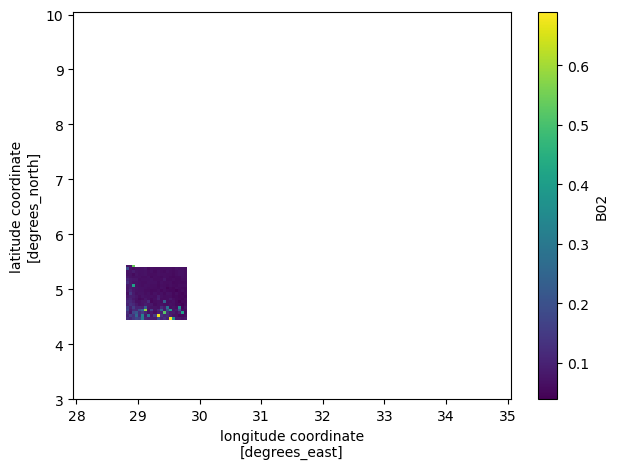

In [17]:
resampled_ds.B02.plot()

Let's try this the other way round: What would it look like if we'd map the fire data onto the S2 grid? To make this better to handle, we build a subset of the S2 grid, where we pick only every tenth pixel x- and y-wise.

In [18]:
s2_ds = ds.isel({"x":slice(0, 10980, 10), "y":slice(0, 10980, 10)})
s2_ds

<xarray.Dataset> Size: 14MB
Dimensions:      (x: 1098, y: 1098)
Coordinates:
  * x            (x) float64 9kB 7e+05 7.001e+05 ... 8.096e+05 8.097e+05
  * y            (y) float64 9kB 6e+05 5.999e+05 ... 4.904e+05 4.903e+05
    spatial_ref  int64 8B 0
Data variables:
    B04          (y, x) float32 5MB dask.array<chunksize=(103, 103), meta=np.ndarray>
    B03          (y, x) float32 5MB dask.array<chunksize=(103, 103), meta=np.ndarray>
    B02          (y, x) float32 5MB dask.array<chunksize=(103, 103), meta=np.ndarray>
Attributes:
    stac_catalog_url:    https://stac.dataspace.copernicus.eu/v1
    stac_item_id:        S2B_MSIL2A_20190116T082309_N0500_R121_T35NQF_2022120...
    xcube_stac_version:  1.1.0

We redefine the values for source_gm and target_gm ...

In [19]:
source_gm = target_gm

In [20]:
target_gm = GridMapping.from_dataset(s2_ds)
target_gm

class: **RegularGridMapping**
* is_regular: True
* is_j_axis_up: False
* is_lon_360: _unknown_
* crs: PROJCRS["WGS 84 / UTM zone 35N",BASEGEOGCRS["WGS 84",DATUM["World Geodetic System 1984",ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4326]],CONVERSION["UTM zone 35N",METHOD["Transverse Mercator",ID["EPSG",9807]],PARAMETER["Latitude of natural origin",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",27,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["Scale factor at natural origin",0.9996,SCALEUNIT["unity",1],ID["EPSG",8805]],PARAMETER["False easting",500000,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",0,LENGTHUNIT["metre",1],ID["EPSG",8807]]],CS[Cartesian,2],AXIS["easting",east,ORDER[1],LENGTHUNIT["metre",1]],AXIS["northing",north,ORDER[2],LENGTHUNIT["metre",1]],ID["EPSG",32635]]
* xy_res: (100, 100)
* xy_bbox: (699915, 490245, 809715, 600045)
* ij_bbox: (0, 0, 1098, 1098)
* xy_dim_names: ('x', 'y')
* xy_var_names: ('x', 'y')
* size: (1098, 1098)
* tile_size: (103, 103)

And now we may resample the s2 dataset to the fire dataset. (We squeeze it to get rid of the time dimension, which is unnecessary here, as the dataset only has one timestep).

In [21]:
resampled_ds = resample_in_space(
    spat_temp_sub_ds.squeeze(),
    source_gm=source_gm,
    target_gm=target_gm,
)
resampled_ds

<xarray.Dataset> Size: 106MB
Dimensions:                          (y: 1098, x: 1098, vegetation_class: 18,
                                      bnds: 2)
Coordinates:
  * y                                (y) float64 9kB 6e+05 ... 4.903e+05
  * x                                (x) float64 9kB 7e+05 ... 8.097e+05
  * vegetation_class                 (vegetation_class) int32 72B 10 20 ... 180
    x_bnds                           (x, bnds) float64 18kB 6.999e+05 ... 8.0...
    y_bnds                           (y, bnds) float64 18kB 6e+05 ... 4.902e+05
Dimensions without coordinates: bnds
Data variables:
    burned_area                      (y, x) float32 5MB dask.array<chunksize=(103, 103), meta=np.ndarray>
    burned_area_in_vegetation_class  (vegetation_class, y, x) float32 87MB dask.array<chunksize=(18, 103, 103), meta=np.ndarray>
    fraction_of_burnable_area        (y, x) float32 5MB dask.array<chunksize=(103, 103), meta=np.ndarray>
    fraction_of_observed_area        (y, x) float32 5MB dask.array<chunksize=(103, 103), meta=np.ndarray>
    standard_error                   (y, x) float32 5MB dask.array<chunksize=(103, 103), meta=np.ndarray>
    crs                              int64 8B 0
Attributes: (12/18)
    Conventions:                CF-1.7
    title:                      esacci.FIRE.mon.L4.BA.MSI-(Sentinel-2).Sentin...
    date_created:               2025-09-29T15:48:30.342376
    processing_level:           L4
    time_coverage_start:        2019-01-01T00:00:00
    time_coverage_end:          2020-01-01T00:00:00
    ...                         ...
    geospatial_lat_resolution:  0.04999999999999716
    geospatial_lat_min:         3.0
    geospatial_lat_max:         10.049999999999997
    geospatial_lat_units:       degree_north
    geospatial_bounds_crs:      CRS84
    geospatial_bounds:          POLYGON((27.94999999999999 3.0, 27.9499999999...

... and we may now reproject the data to see it is on the same grid as the S2 Data.

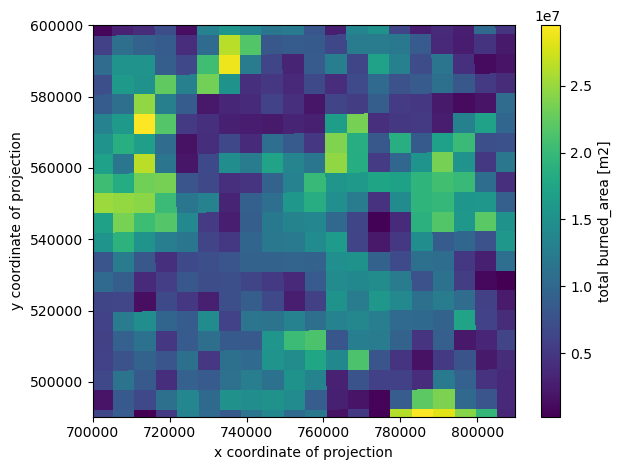

In [22]:
resampled_ds.burned_area.plot()